In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os

In [2]:
# Read the data excel sheet
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name = 1)
df.to_csv('Bank_Personal_Loan_Modelling.csv',index = None, header = True)
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [3]:
# Read the Description Excel Sheet
df1 = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name = 'Description')
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.shape

(5000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Data set basic Information:

In this dataset there are 5000 different customers.

We have 13 independet variables and 1 dependent Personal Loan

We have 6 numeric variables : ID, Age, Experience, Income, CC_Avg, Mortgage

We have 3 categorical variables: Family,Education, ZIP code (since it is unique for every town)

We have 5 boolean Personal Loan, Securities Account, CD Account, Online, CreditCard

There are no missing values or duplicated values.

# Step 1: Univariate Analysis

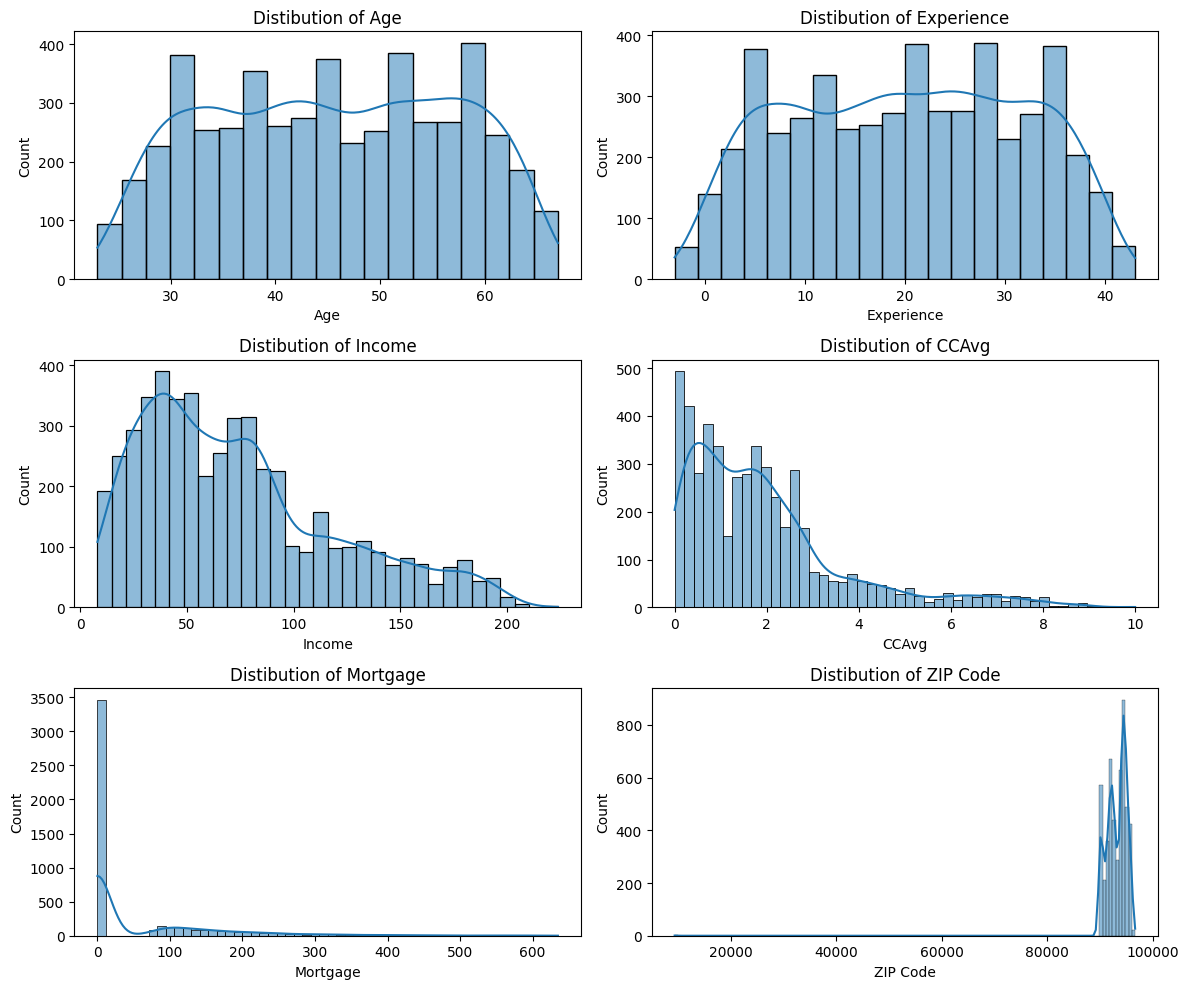

In [10]:
# Plot continues data
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 10))  #figures fig are the entire canvas. Ax are a single plot
axes = axes.flatten()  # axes is numpy array

for i,x in enumerate(["Age", "Experience", "Income", "CCAvg", "Mortgage","ZIP Code"]):
    sns.histplot(df,x = x ,kde = True,ax = axes[i])
    axes[i].set_title(f'Distibution of {x}')
    
plt.tight_layout()
plt.show()

# Experience

In [11]:
# In Experience catgory there are some negative values
df_filtered = df[df['Experience']<0]
df_filtered.count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [12]:
#Since there are only 52 null values out of 5000. 
# We assume that here values are incorrectly 
# recorder as negative so we will replace then with their absolute value 
df['Experience'] = df['Experience'].apply(abs)

# Zip Code

      ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1  


Text(9307.0, 1, 'Min value')

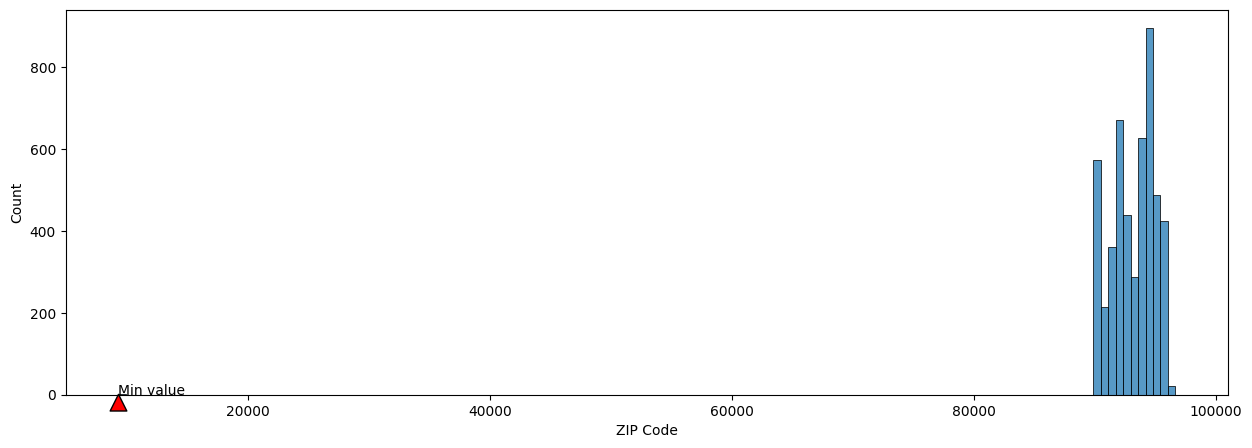

In [13]:
# Zip code under 80000
print(df[df["ZIP Code"]<80000])

#ZIP Code feature has a minimum value that is much smaller than the average value
df["ZIP Code"].describe()
color = 'red'
#Let 's see a further visualization
plt.figure(figsize = (15,5))
sns.histplot(data = df,x = df["ZIP Code"])
plt.annotate('Min value' ,xy =(9307.000000,1),
             xycoords='data',
            arrowprops=dict(facecolor='red', shrink=0.01))


# Mortgage

Mortgage is positive skewed. That 's meaning that most data points are clustered in the left with a few high- value outliers on the right

<Figure size 1000x700 with 0 Axes>

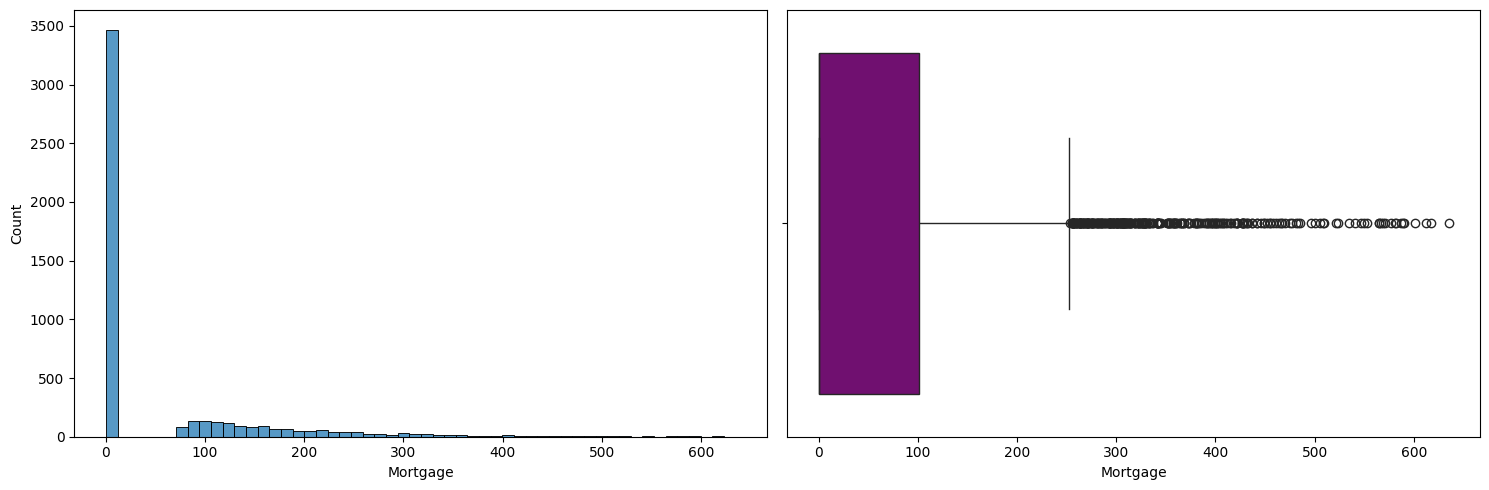

In [14]:
# Mortgage further analysis
fig = plt.figure(figsize =(10, 7))
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.histplot(x= 'Mortgage', data = df, ax = ax[0])
sns.boxplot(x='Mortgage', data = df,color='purple',ax = ax[1])
plt.tight_layout()
plt.show()

In [15]:
# Identify mortgage outliers
Q1 = np.percentile(df['Mortgage'], 25, method='midpoint')
Q3 = np.percentile(df['Mortgage'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

# we have only upper outliers so 
upper = Q3+1.5*IQR
upper_array = df['Mortgage'] >= upper
print("Upper Bound:", upper)
print(upper_array.sum())

# there are only 291 outliers. So we will drop there records
df = df.drop(df[upper_array].index)


101.0
Upper Bound: 252.5
291


In [17]:
#Since there is only one Zip Code on this min value we drop this whole line
df.drop(df[df["ZIP Code"] < 80000].index,inplace = True)

#Rescale the index because now there is one row lesser
df.reset_index(drop = True, inplace= True)

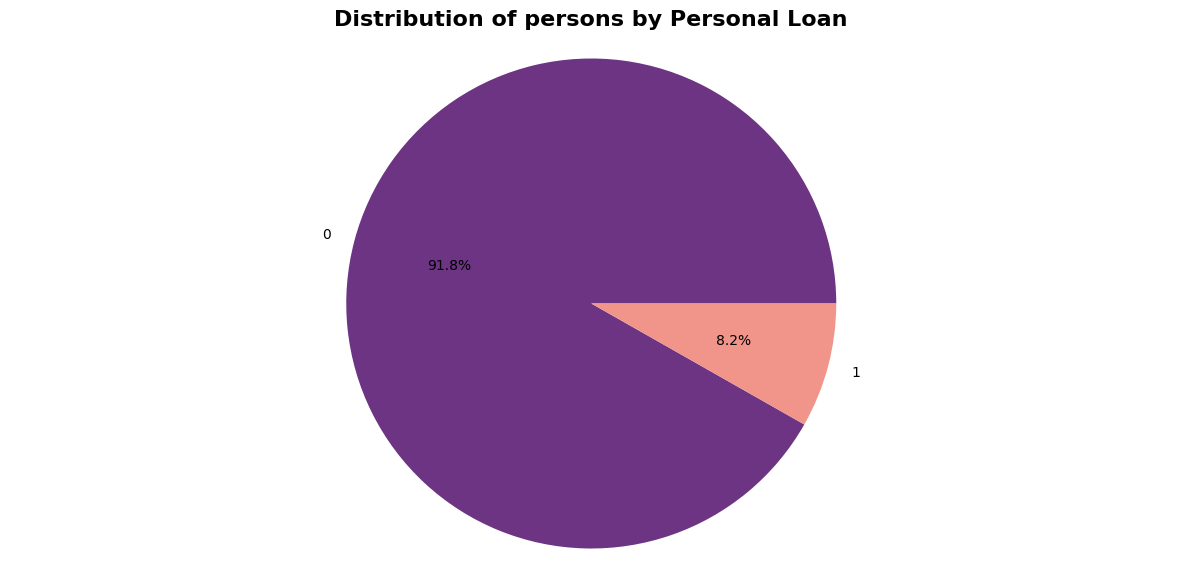

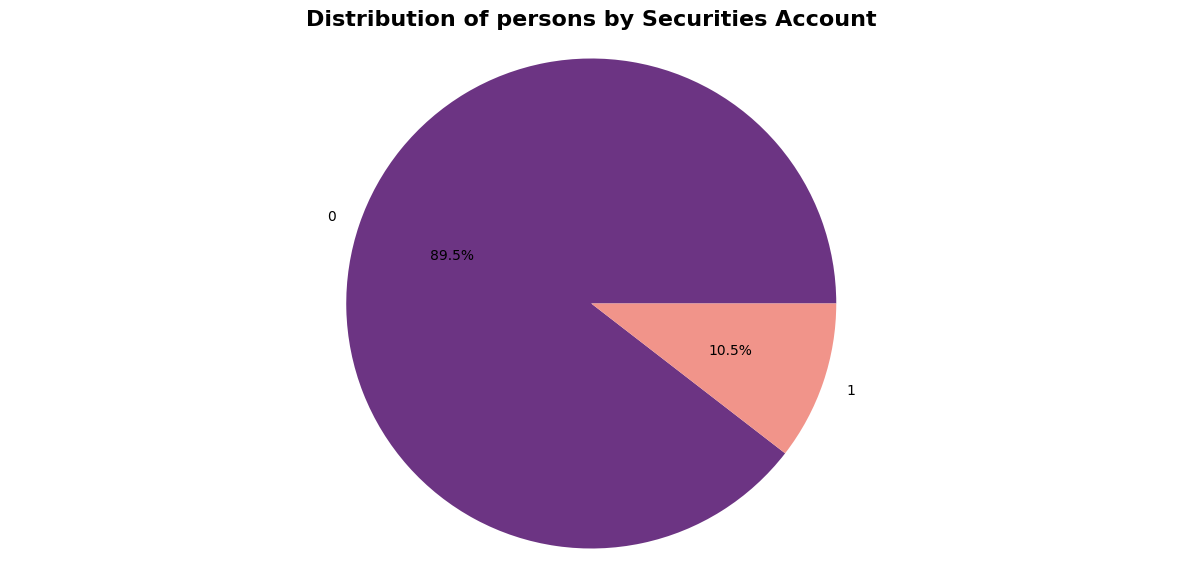

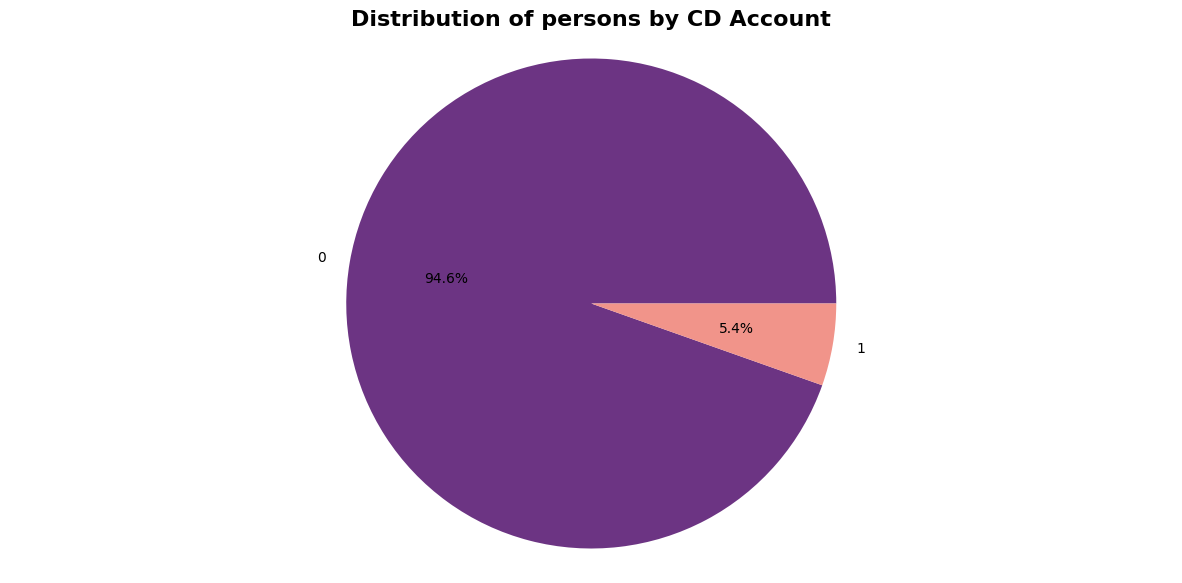

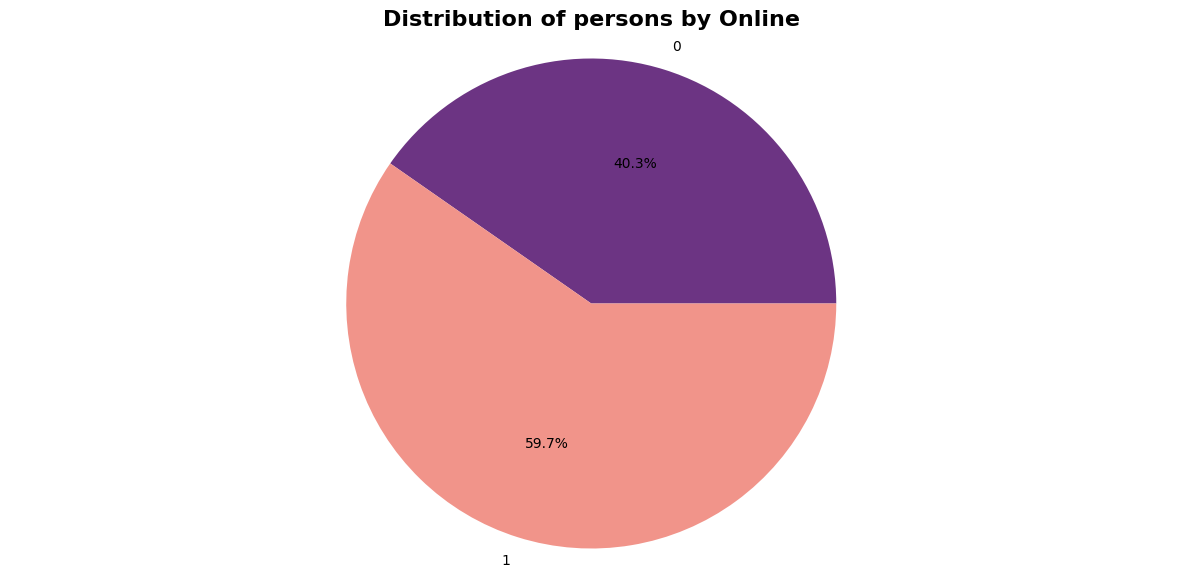

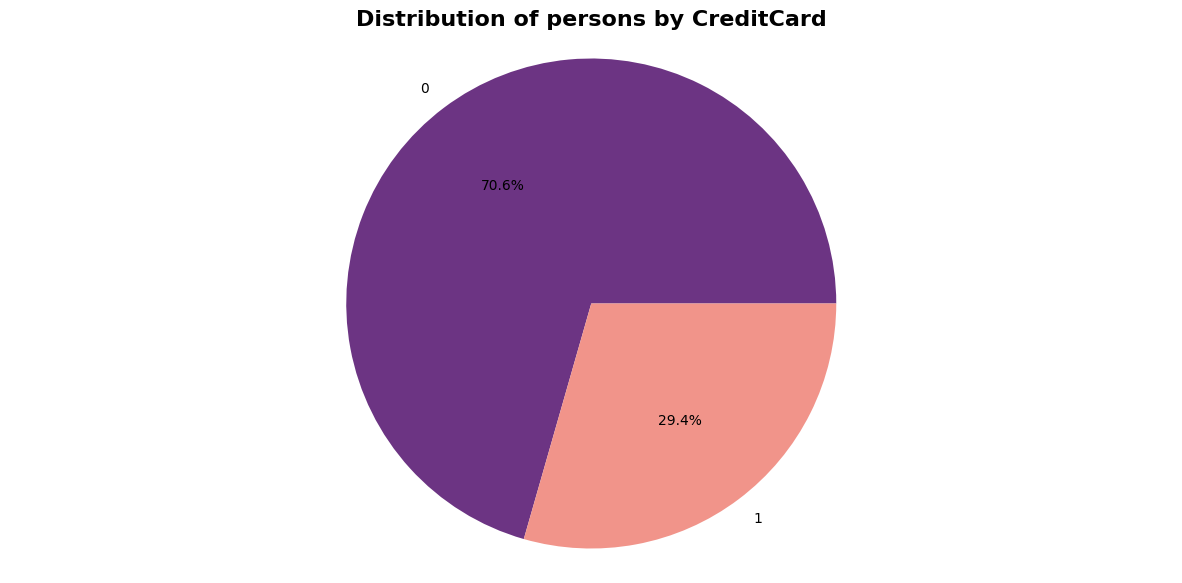

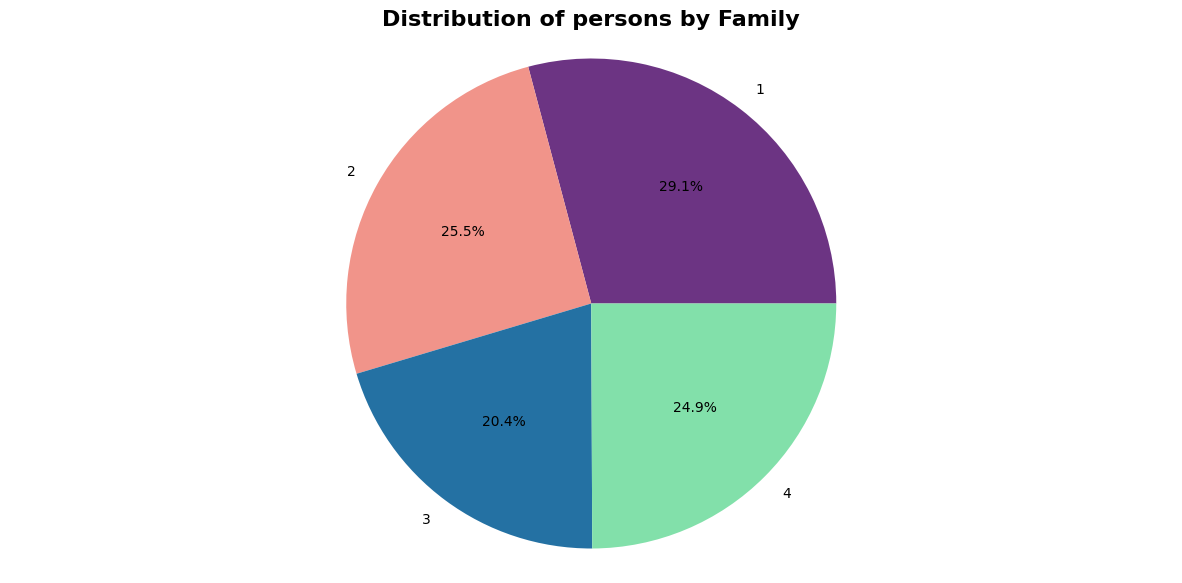

In [18]:
# Let s plot categorical columns
def plot_categ_(df: pd.DataFrame, col: str):
    df4 = df.groupby(col).size()
    df4.plot.pie(autopct ='%1.1f%%',figsize=(15,7),colors = ['#6C3483', '#F1948A', '#2471A3', '#82E0AA', '#A569BD', '#F7DC6F'])
    plt.title(f'Distribution of persons by {col}', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.show()
    
for col in ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard", "Family"]:
    plot_categ_(df,col)


# Pearson Correlation Analysis

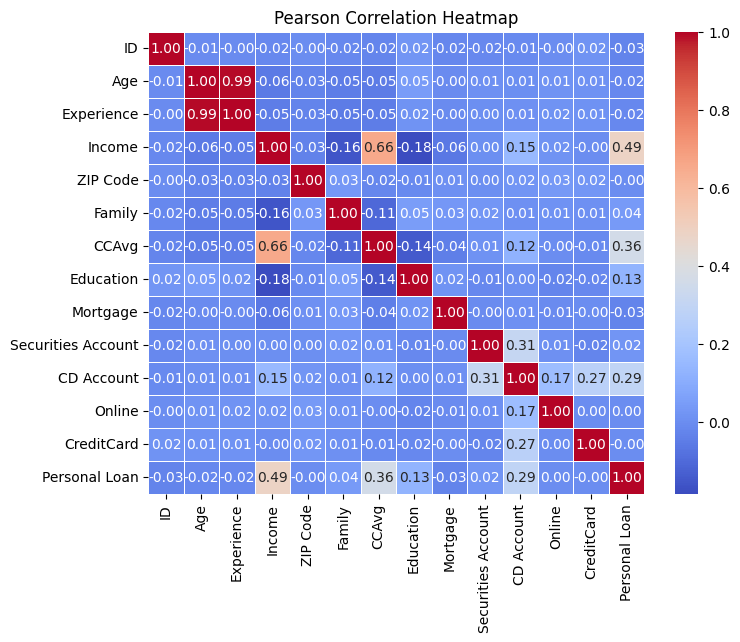

In [ ]:
# Exclude the target variable
target = 'Personal Loan'
df_n = pd.concat([df.drop(target,axis =1), df[target]], axis =1 ) # place the target in the end
matrix = df_n.corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

Add correlations abou the data